In [3]:
# Importing all necessary Packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import scipy.stats as stats


In [4]:
# Load csv from route, r added to fix bugs.
df = pd.read_csv(r'C:\Users\skill\source\repos\IntroductionToDataScience\Assesment 3\cars_info.csv')

In [5]:
# Drop unnecessary columns, our focus is not related to these variables.
df.drop(columns=['ID','Name','Series','Model','Variant', 'Seating Capacity'],inplace=True)

In [6]:
# Explore Data
print("Data Overview:")
print(df.head(10))

Data Overview:
    Price          Brand  Year  Kilometers         Type    Gearbox  \
0    9999         Toyota  2010      263000        Wagon  Automatic   
1  117990  Mercedes-Benz  2021          19        Wagon  Automatic   
2   79990  Mercedes-Benz  2021          24        Wagon  Automatic   
3   34990  Mercedes-Benz  2010      120579    Cabriolet  Automatic   
4   15990         Holden  2016       72506  Sportswagon  Automatic   
5   26800         Nissan  2017      121870        Wagon  Automatic   
6   23990           Ford  2016      154136        Wagon  Automatic   
7   18990            BMW  2011      117306        Sedan  Automatic   
8   15490         Holden  2005      172151        Sedan  Automatic   
9   15490         Holden  2003      186990        Sedan  Automatic   

                      Fuel         Status    CC  Color  
0          Unleaded Petrol           Used  2362   Grey  
1                   Diesel   New In Stock  2143  Black  
2                   Diesel   New In Stock  

In [7]:
# Displaying Info
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       17048 non-null  int64 
 1   Brand       17048 non-null  object
 2   Year        17048 non-null  int64 
 3   Kilometers  17048 non-null  int64 
 4   Type        17048 non-null  object
 5   Gearbox     17048 non-null  object
 6   Fuel        17048 non-null  object
 7   Status      17048 non-null  object
 8   CC          17048 non-null  int64 
 9   Color       17048 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [8]:
# Checking for Null and Duplicated Values 
print("\nNull Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Null Values:
 Price         0
Brand         0
Year          0
Kilometers    0
Type          0
Gearbox       0
Fuel          0
Status        0
CC            0
Color         0
dtype: int64

Duplicate Rows: 65


In [9]:
# Handle Duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Drop rows with missing target variable (In case of having)
df.dropna(subset=['Price'], inplace=True)

In [11]:
# Filling missing values *It is already done before, just for applying knowledge purposes*
df.fillna({'Kilometers':df['Kilometers'].median()}, inplace=True)
df.fillna('Unknown', inplace=True)

In [15]:
## Start with the Univariate Analysis
# Price Description
df.Kilometers.describe()

count    1.698300e+04
mean     1.034418e+05
std      8.038596e+04
min      1.000000e+00
25%      4.478550e+04
50%      8.881400e+04
75%      1.490330e+05
max      2.700000e+06
Name: Kilometers, dtype: float64

In [13]:
## Start with the Univariate Analysis
# Price Description
df.CC.describe()

count    16983.000000
mean      2492.947948
std        882.141169
min        875.000000
25%       1987.000000
50%       2354.000000
75%       2982.000000
max       7300.000000
Name: CC, dtype: float64

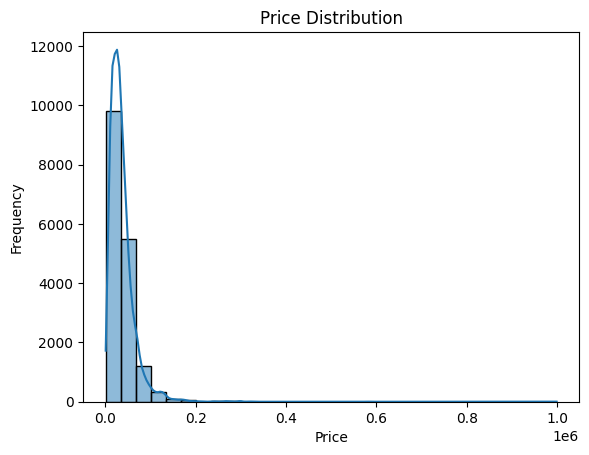

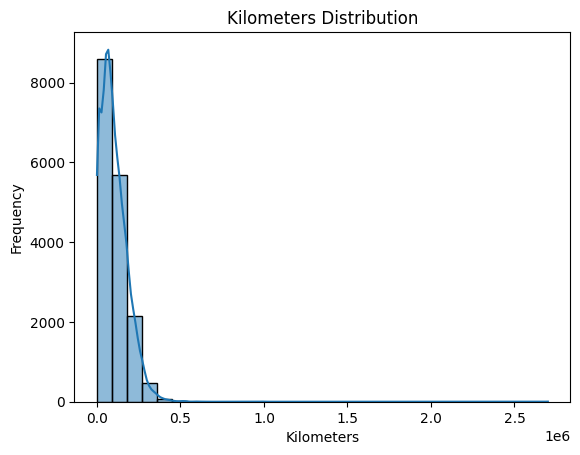

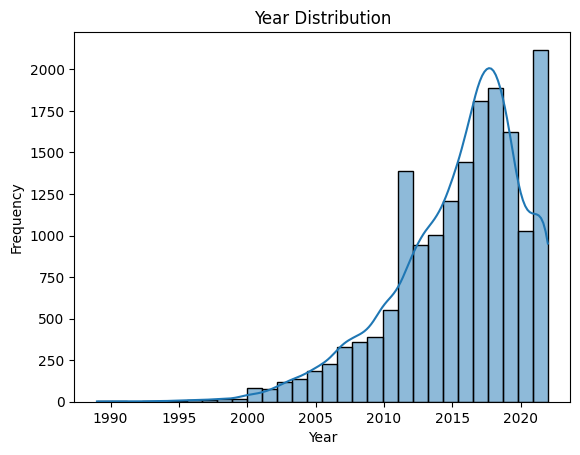

In [11]:
# Numerical Columns Distribution
numerical_columns = ['Price', 'Kilometers', 'Year']
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [12]:
# Brand Information
df.Brand.value_counts()

Brand
Toyota             2750
Holden             1500
Ford               1490
Mazda              1164
Hyundai            1087
Mitsubishi         1072
Volkswagen         1012
Nissan             1005
Kia                 742
Subaru              654
Mercedes-Benz       623
Audi                518
BMW                 479
Honda               412
Jeep                379
Land Rover          273
Isuzu               267
Lexus               180
Volvo               160
Suzuki              160
Skoda               158
Renault             150
LDV                 116
MG                   95
Porsche              91
Mini                 66
Peugeot              45
Chrysler             42
Jaguar               38
HSV                  37
GWM                  28
Great Wall           27
Ram                  23
Fiat                 17
Dodge                14
Citroen              13
Alfa Romeo           11
Ssangyong            11
Infiniti              9
Maserati              8
Chevrolet             7
Bentley   

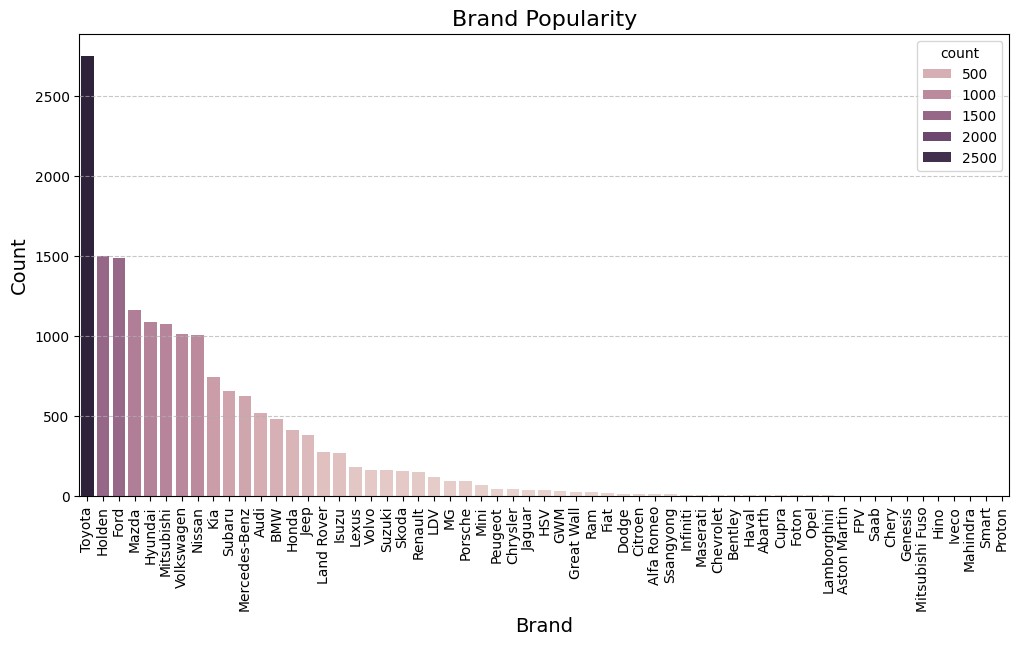

In [13]:
# Brand Popularity
plt.figure(figsize=(12, 6))
brand_counts = df['Brand'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values, hue=brand_counts)
plt.title("Brand Popularity", fontsize=16)
plt.xlabel("Brand", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
# Body Type Information
df.Type.value_counts()

Type
Wagon                    7740
Hatchback                2412
Sedan                    2320
Dual Cab Utility          655
Coupe                     468
Cab Chassis               424
Double Cab Pick Up        422
Dual Cab Pick-up          421
Van                       383
Crew Cab Pickup           269
Crew Cab Utility          207
Double Cab Utility        206
Utility                   178
Sportswagon               143
Double Cab Chassis         95
Crew Cab Chassis           77
Dual Cab Chassis           71
Convertible                44
Sportback                  43
Liftback                   39
Fastback                   36
Hardtop                    36
Cabriolet                  35
Softtop                    35
Super Cab Utility          23
Bus                        21
Space Cab Chassis          21
Super Cab Chassis          19
X Cab Pickup               13
Roadster                   13
Saloon                     13
Freestyle Cab Chassis      11
Space Cab Utility          10
X Cab

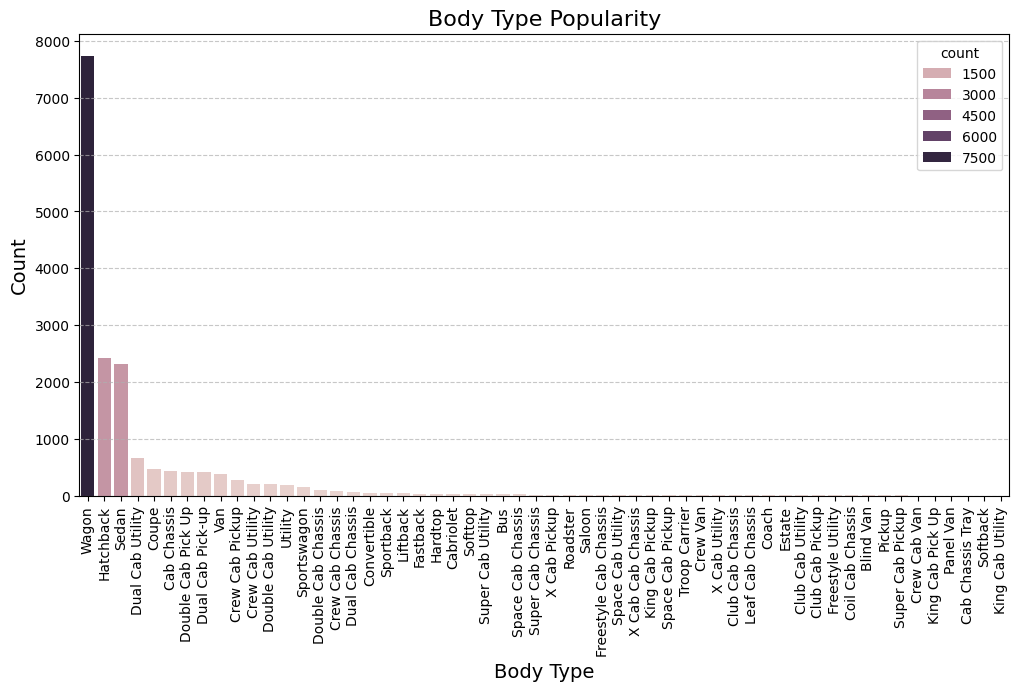

In [15]:
# Body Type Popularity
plt.figure(figsize=(12, 6))
type_counts = df['Type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts)
plt.xticks(rotation=90)
plt.title("Body Type Popularity", fontsize=16)
plt.xlabel("Body Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Fuel type Information
count=df.Fuel.value_counts()
count

Fuel
Unleaded Petrol              6988
Diesel                       6065
Premium Unleaded Petrol      3423
Unleaded Petrol/Electric      255
Premium Unleaded/Electric     194
Liquid Petroleum Gas           40
Diesel/Electric                18
Name: count, dtype: int64

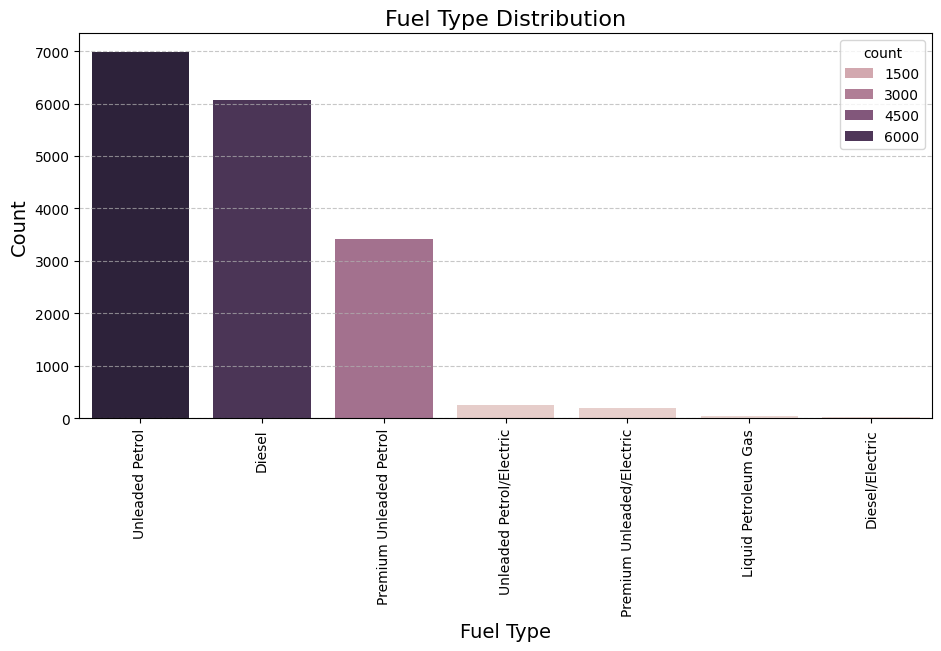

In [17]:
# Fuel Type Distribution
plt.figure(figsize=(11, 5))
fuel_counts = df['Fuel'].value_counts()
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, hue=fuel_counts)
plt.title("Fuel Type Distribution", fontsize=16)
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Vehicle ownership status
count=df.Gearbox.value_counts()
count

Gearbox
Automatic    14516
Manual        2443
AWD             13
Front            8
Rear             3
Name: count, dtype: int64

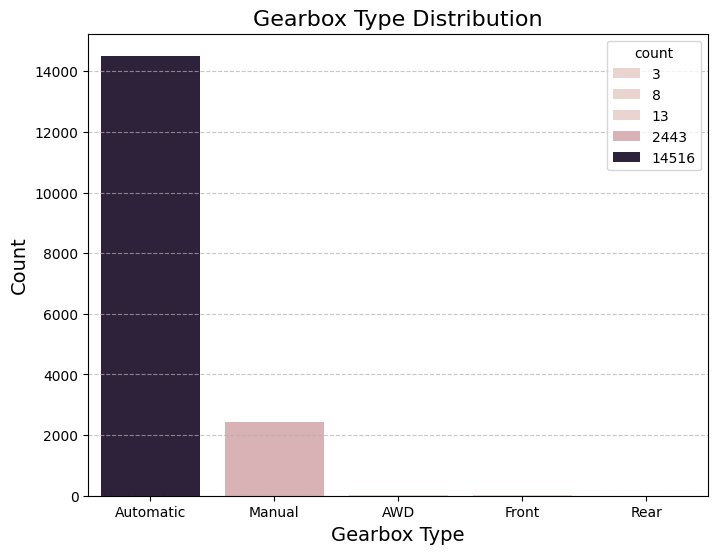

In [19]:
# Gearbox Type Distribution
plt.figure(figsize=(8, 6))
gearbox_counts = df['Gearbox'].value_counts()
sns.barplot(x=gearbox_counts.index, y=gearbox_counts.values, hue=gearbox_counts)
plt.title("Gearbox Type Distribution", fontsize=16)
plt.xlabel("Gearbox Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Vehicle ownership status
count=df.Status.value_counts()
count

Status
Used            16264
Demo              385
New In Stock      334
Name: count, dtype: int64

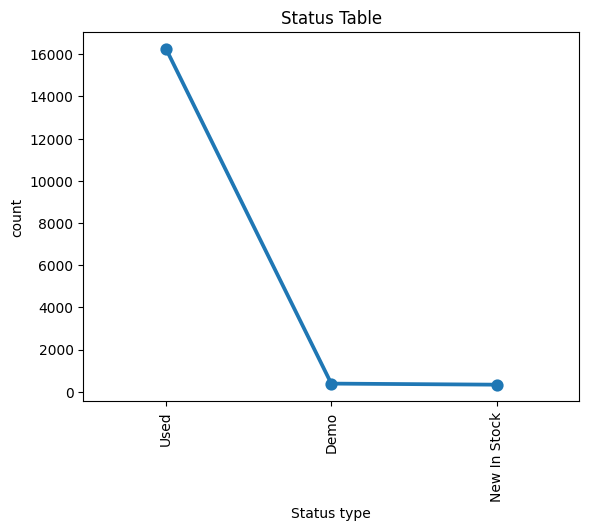

In [21]:
# Status distribution
sns.pointplot(x=['Used','Demo','New In Stock'],y=count)
plt.xticks(rotation=90)
plt.title('Status Table')
plt.xlabel('Status type')
plt.show()

In [22]:
# Statistical Summary
for col in numerical_columns:
    print(f"{col} - Mean: {df[col].mean()}, Median: {df[col].median()}, Std: {df[col].std()}")

Price - Mean: 36761.13725490196, Median: 29990.0, Std: 30334.984257372045
Kilometers - Mean: 103441.80910322086, Median: 88814.0, Std: 80385.95602004183
Year - Mean: 2015.468232938821, Median: 2016.0, Std: 4.719443688225077


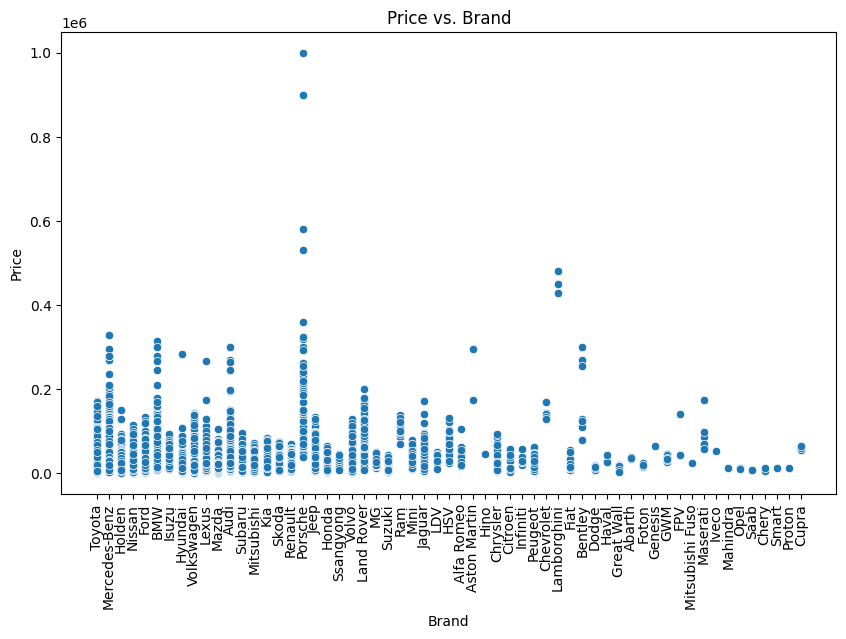

In [23]:
# Start with the Multivariate Analysis
# Price Vs Brand
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Brand', y='Price')
plt.xticks(rotation=90)
plt.title('Price vs. Brand')
plt.show()

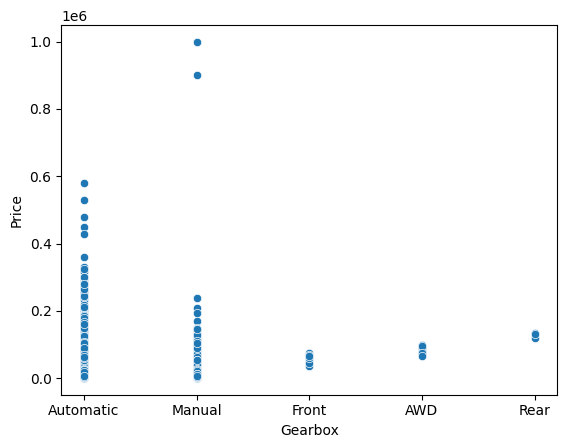

In [24]:
# Gearbox vs Brand 
sns.scatterplot(df, x='Gearbox', y='Price')
plt.show()

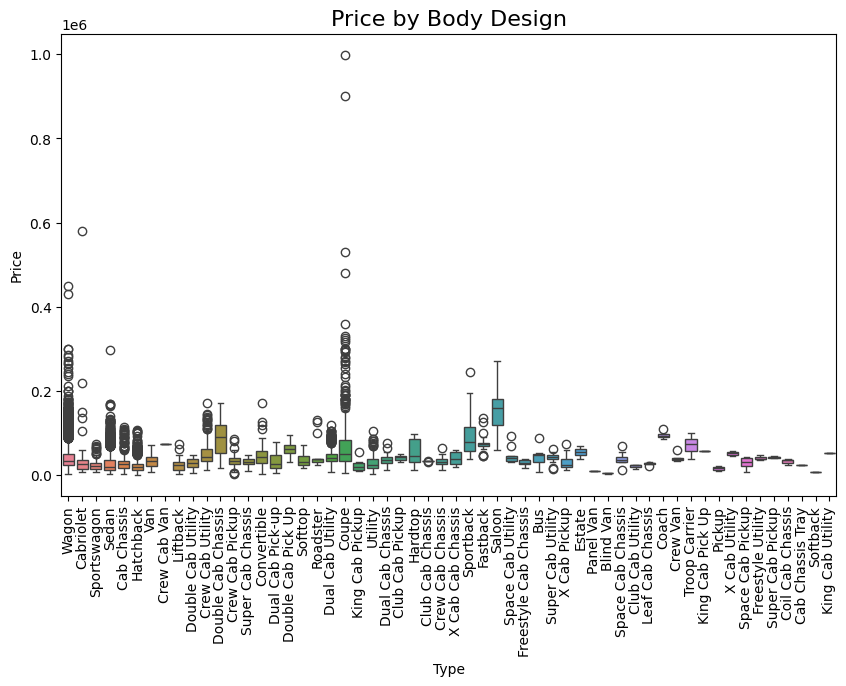

In [25]:
# Price vs Body Design
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Price', hue="Type")
plt.title("Price by Body Design", fontsize=16)
plt.xticks(rotation=90)
plt.show()

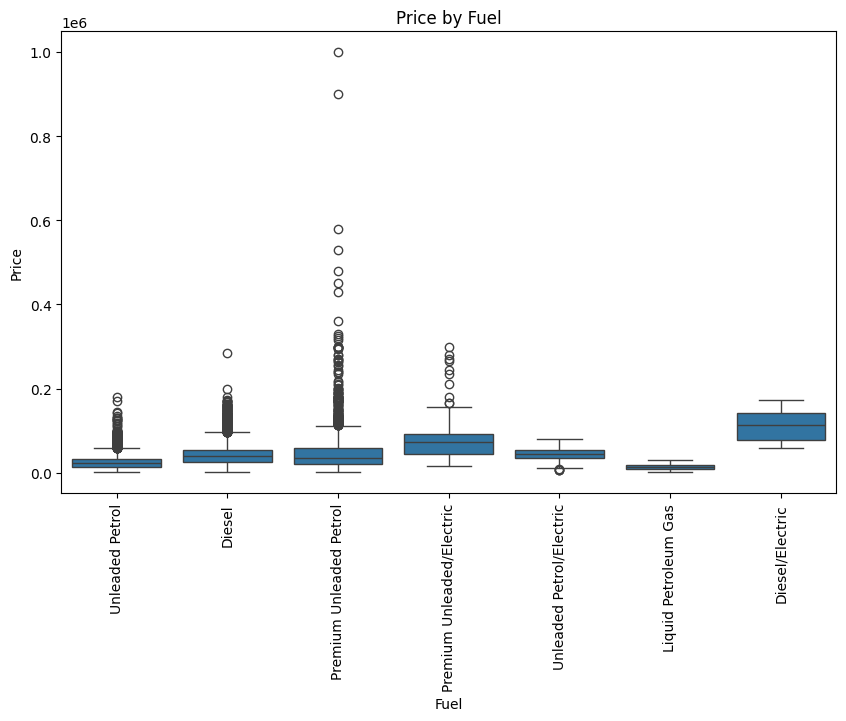

In [26]:
# Price Vs Fuel
plt.figure(figsize=(10, 6))
sns.boxplot(x="Fuel", y='Price', data=df)
plt.title(f"Price by Fuel")
plt.xticks(rotation=90)
plt.show()

In [27]:
# Correlation
df.corr(numeric_only=True)

,Price,Year,Kilometers,CC
Price,1.000000,0.488221,-0.447425,0.298258
Year,0.488221,1.000000,-0.727546,-0.173307
Kilometers,-0.447425,-0.727546,1.000000,0.184531
CC,0.298258,-0.173307,0.184531,1.000000


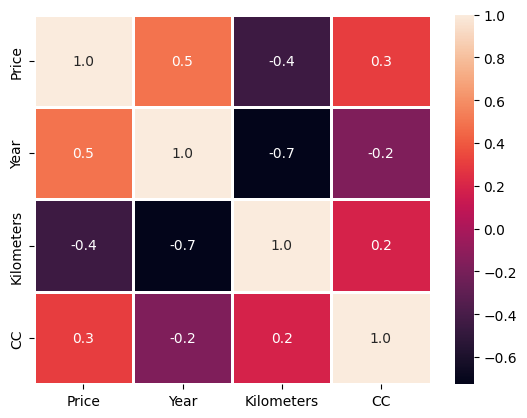

In [28]:
# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=1)
plt.show()

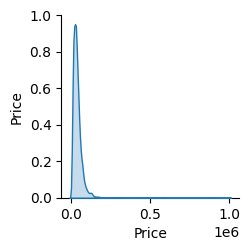

In [29]:
# Pairplot for key variables
sns.pairplot(df[['Price', 'Brand', 'Gearbox', 'Type', 'Fuel']], diag_kind='kde')
plt.show()

In [30]:
# Hypothesis Testing
# ANOVA Test for Categorical Variables
categorical_columns = ['Brand', 'Fuel', 'Gearbox', 'Type', 'Status']
for col in categorical_columns:
    f_val, p_val = stats.f_oneway(*[df.loc[df[col] == val, 'Price'] for val in df[col].unique()])
    print(f"{col} ANOVA Test: F={f_val}, P={p_val}")

Brand ANOVA Test: F=108.50632503592261, P=0.0
Fuel ANOVA Test: F=443.7617800213486, P=0.0
Gearbox ANOVA Test: F=66.66524117472702, P=4.642924673748915e-56
Type ANOVA Test: F=60.220613439277585, P=0.0
Status ANOVA Test: F=285.44054686405866, P=1.1832850210286804e-122


In [31]:
# Encode categorical variables for multivariate modeling
encoder = LabelEncoder()
categorical_columns = ['Brand', 'Gearbox', 'Type', 'Fuel', 'Status', 'Color']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [32]:
# Standardize numerical variables
scaler = StandardScaler()
numerical_columns = ['Type', 'Gearbox', 'Fuel', 'Status', 'CC', 'Color', 'Year']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
# Split Data
X=df.drop(columns=['Price'])
y=df.Price

In [34]:
X

,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color
0,56,-1.158695,263000,0.879827,-0.409121,0.984784,0.199552,-0.148448,-0.715142
1,39,1.172157,19,0.879827,-0.409121,-1.256998,-2.870189,-0.396715,-1.534210
2,39,1.172157,24,0.879827,-0.409121,-1.256998,-2.870189,-0.396715,-1.534210
3,39,-1.158695,120579,-2.316245,-0.409121,-1.256998,0.199552,-0.396715,-1.534210
4,22,0.112679,72506,0.413733,-0.409121,0.984784,0.199552,-0.790087,0.949848
...,...,...,...,...,...,...,...,...,...
17043,22,-2.641964,230441,-0.052361,-0.409121,0.984784,0.199552,1.471522,-0.795706
17044,56,-1.582486,237113,-0.718209,2.432640,0.984784,0.199552,-1.353506,1.016985
17045,22,-2.853860,238768,0.879827,-0.409121,-1.256998,0.199552,0.573680,-0.795706
17046,24,0.112679,49800,-0.718209,2.432640,0.984784,0.199552,-0.788954,-1.520782


In [35]:
y

0          9999
1        117990
2         79990
3         34990
4         15990
          ...  
17043      4499
17044      4999
17045      7999
17046     14000
17047      5999
Name: Price, Length: 16983, dtype: int64

In [36]:
# Machine Learning models to implement
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
}

In [37]:
# Modeling dataset, applying 0.2 for testing
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [38]:
# Storing the results in results array, creating a for loop to use all the models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_valid)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_valid, y_valid)
    mse = mean_squared_error(y_valid, y_test_pred)
    r2 = r2_score(y_valid, y_test_pred)
    
    results.append({
        'Model': name,
        'Train_Score': train_score * 100,
        'Test_Score': test_score * 100,
        'Mean_Squared Error': mse,
        'R2': r2
    })

results_df = pd.DataFrame(results)

In [39]:
# Printing the results dataframe in scale 0 to 10
results_df

,Model,Train_Score,Test_Score,Mean_Squared Error,R2
0,Lasso,4.802416e+01,3.902238e+01,6.972440e+08,3.902238e-01
1,Ridge,4.802416e+01,3.902239e+01,6.972439e+08,3.902239e-01
2,SGDRegressor,-5.892573e+29,-4.144897e+29,4.739452e+36,-4.144897e+27
3,LinearRegression,4.802416e+01,3.902240e+01,6.972438e+08,3.902240e-01
4,SVR,-2.226453e-01,-1.874824e+00,1.164880e+09,-1.874824e-02
5,KNeighborsRegressor,4.439076e+01,1.288626e+01,9.960955e+08,1.288626e-01
6,DecisionTreeRegressor,9.998525e+01,7.111856e+01,3.302426e+08,7.111856e-01
7,RandomForestRegressor,9.772419e+01,7.739959e+01,2.584227e+08,7.739959e-01
8,BaggingRegressor,9.734481e+01,7.702041e+01,2.627584e+08,7.702041e-01
9,ExtraTreesRegressor,9.998525e+01,8.624252e+01,1.573088e+08,8.624252e-01


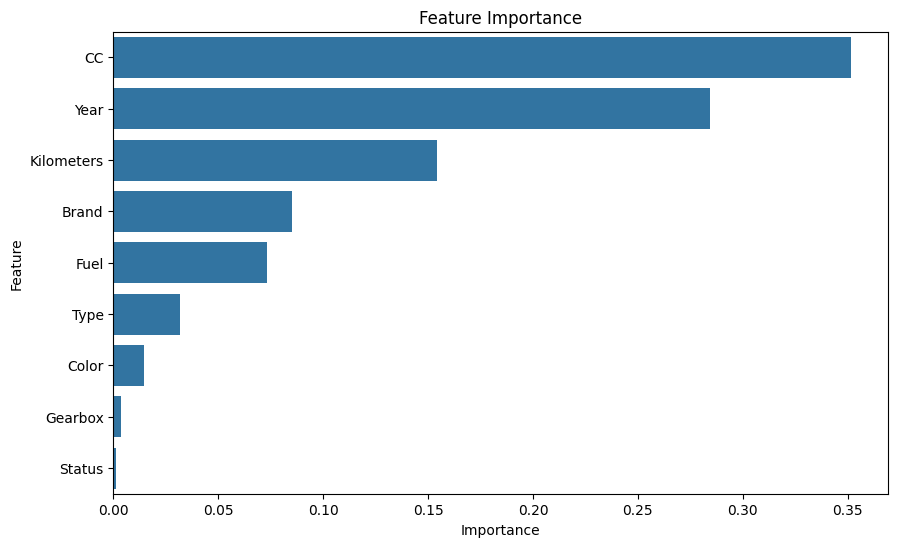

In [40]:
# Feature Importance
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [41]:
# Displaying Feature importance values
feature_importance

,Feature,Importance
7,CC,0.351788
1,Year,0.284290
2,Kilometers,0.154399
0,Brand,0.085196
5,Fuel,0.073304
3,Type,0.031896
8,Color,0.014543
4,Gearbox,0.003584
6,Status,0.001000
